<a href="https://colab.research.google.com/github/greenmantice18/Codeit-Internship-AIML/blob/main/KNN_ALGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***K-NN Algorithm (Classification)***

In [2]:
#importing data
import kagglehub
import pandas as pd
import numpy as np
import os

# 1. Import Dataset
path = kagglehub.dataset_download("mirichoi0218/insurance")
csv_path = os.path.join(path, "insurance.csv")
df = pd.read_csv(csv_path)

# 2. Structure & Feature Understanding
print(f"Dataset Shape: {df.shape}")
print("\nFeature Types:\n", df.dtypes)
display(df.head())

Using Colab cache for faster access to the 'insurance' dataset.
Dataset Shape: (1338, 7)

Feature Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Data cleansing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Encoding Categorical Variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
# Target Variable: Smoker (0 = No, 1 = Yes)
df['smoker'] = le.fit_transform(df['smoker'])

# 2. Handling Missing Values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 3. Splitting Features and Target
X = df.drop('smoker', axis=1).values
y = df['smoker'].values

# 4. 80:20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing Complete. Data scaled and split into 80:20 ratio.")

Preprocessing Complete. Data scaled and split into 80:20 ratio.


In [4]:
#Cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = [3, 5, 7, 9, 11, 13, 15]
k_avg_scores = []

print("--- 10-Fold Cross-Validation Results ---")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 10-fold CV
    scores = cross_val_score(knn, X_train, y_train, cv=10)

    print(f"\nK = {k}:")
    print(f"Scores for each fold: {np.round(scores, 3)}")
    print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.3f})")

    k_avg_scores.append(scores.mean())

# Identify the most accurate K
optimal_k = k_values[np.argmax(k_avg_scores)]
print(f"\nConclusion: The most accurate value of K to choose is {optimal_k}")

--- 10-Fold Cross-Validation Results ---

K = 3:
Scores for each fold: [0.972 0.925 0.981 0.981 0.888 0.935 0.916 0.963 0.953 0.953]
Mean Accuracy: 0.9467 (+/- 0.058)

K = 5:
Scores for each fold: [0.953 0.925 0.963 0.972 0.897 0.935 0.916 0.963 0.953 0.963]
Mean Accuracy: 0.9439 (+/- 0.047)

K = 7:
Scores for each fold: [0.953 0.925 0.963 0.981 0.897 0.925 0.897 0.944 0.963 0.963]
Mean Accuracy: 0.9411 (+/- 0.055)

K = 9:
Scores for each fold: [0.944 0.916 0.953 1.    0.897 0.907 0.916 0.944 0.944 0.963]
Mean Accuracy: 0.9383 (+/- 0.058)

K = 11:
Scores for each fold: [0.944 0.916 0.953 0.981 0.897 0.888 0.888 0.907 0.925 0.963]
Mean Accuracy: 0.9262 (+/- 0.062)

K = 13:
Scores for each fold: [0.935 0.916 0.953 0.981 0.897 0.907 0.879 0.907 0.925 0.944]
Mean Accuracy: 0.9243 (+/- 0.057)

K = 15:
Scores for each fold: [0.916 0.916 0.944 0.953 0.888 0.907 0.888 0.907 0.916 0.963]
Mean Accuracy: 0.9196 (+/- 0.049)

Conclusion: The most accurate value of K to choose is 3


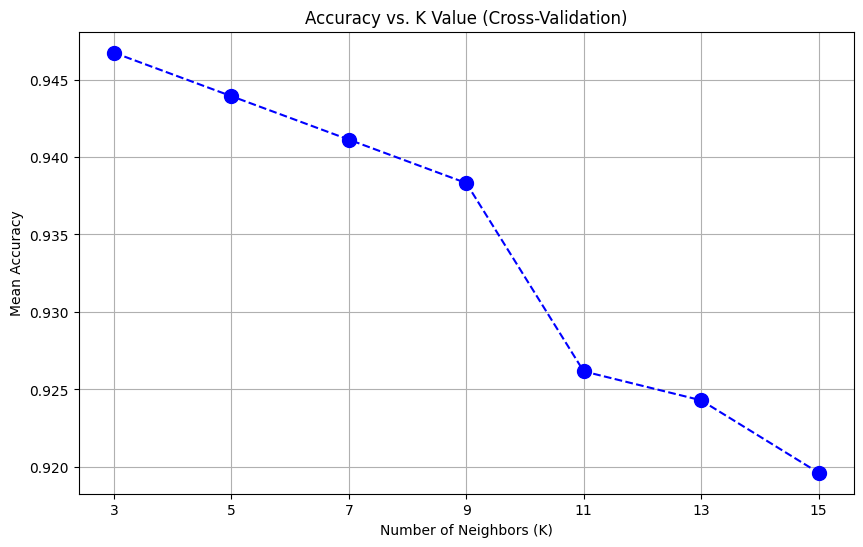

In [5]:
#Visualization And K performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, k_avg_scores, marker='o', linestyle='dashed', color='blue', markersize=10)
plt.title('Accuracy vs. K Value (Cross-Validation)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [8]:
#Final visualization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training final model on the best K
final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("--- Final Model Performance (Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

--- Final Model Performance (Test Set) ---
Accuracy: 0.9440

Confusion Matrix:
[[206   8]
 [  7  47]]

Detailed Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       214
           1       0.85      0.87      0.86        54

    accuracy                           0.94       268
   macro avg       0.91      0.92      0.91       268
weighted avg       0.94      0.94      0.94       268



# **K-NN Algoritm(Regression)**

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Define Features and Target
# Features: Age, BMI, Children, Smoker(encoded), Region(encoded)
X_reg = df.drop('charges', axis=1).values
y_reg = df['charges'].values

# 2. 80:20 Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Scaling (Essential for KNN distance calculation)
scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

print(f"Regression Data Ready: {X_train_r.shape[0]} training samples.")
# Create a temporary DataFrame to view the scaled training data with column names
column_names = df.drop('charges', axis=1).columns
X_train_df = pd.DataFrame(X_train_r, columns=column_names)

# Display the shape and the first 5 rows
print(f"Table Shape: {X_train_df.shape}")
display(X_train_df.head())

Regression Data Ready: 1070 training samples.
Table Shape: (1070, 6)


,age,sex,bmi,children,smoker,region
0,0.472227,-1.024602,-1.756525,0.734336,-0.508747,-0.456116
1,0.543313,-1.024602,-1.033082,-0.911192,-0.508747,-1.353256
2,0.898745,-1.024602,-0.943687,-0.911192,-0.508747,0.441024
3,-0.025379,-1.024602,0.622393,3.202629,-0.508747,0.441024
4,1.040918,-1.024602,-1.504893,1.557100,-0.508747,-0.456116


In [13]:
k_values = [3, 5, 7, 9, 11, 13, 15]
k_mae_scores = []

print("--- 10-Fold Cross-Validation (Regression) ---")
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)

    # We use negative MAE because cross_val_score tries to maximize values
    scores = cross_val_score(knn_reg, X_train_r, y_train_r, cv=10, scoring='neg_mean_absolute_error')
    mae_scores = -scores # Convert back to positive error values

    print(f"\nK = {k}:")
    print(f"MAE for each fold: {np.round(mae_scores, 2)}")
    print(f"Average MAE: ${mae_scores.mean():.2f}")

    k_mae_scores.append(mae_scores.mean())

# Finding the K with the Minimum Error
optimal_k_reg = k_values[np.argmin(k_mae_scores)]
print(f"\nConclusion: The optimal K for regression is {optimal_k_reg} (Minimum Error).")

--- 10-Fold Cross-Validation (Regression) ---

K = 3:
MAE for each fold: [3102.71 2994.43 3243.78 3271.98 3808.33 3866.35 3508.43 3717.16 2890.53
 3366.72]
Average MAE: $3377.04

K = 5:
MAE for each fold: [2910.11 3096.65 3061.11 3336.38 3571.59 3381.81 3421.93 3517.8  2750.08
 3261.51]
Average MAE: $3230.90

K = 7:
MAE for each fold: [2993.55 3270.65 3143.6  3203.04 3630.48 3535.45 3475.13 3530.53 2844.98
 3272.86]
Average MAE: $3290.03

K = 9:
MAE for each fold: [3022.03 3188.04 2945.68 3002.84 3475.91 3427.47 3709.89 3463.49 2946.9
 3275.33]
Average MAE: $3245.76

K = 11:
MAE for each fold: [2994.17 3245.27 2988.54 3057.94 3353.08 3225.93 3909.25 3389.73 3146.87
 3316.68]
Average MAE: $3262.75

K = 13:
MAE for each fold: [2993.53 3309.41 2962.67 3169.69 3388.46 3185.49 3911.13 3440.97 3146.91
 3324.65]
Average MAE: $3283.29

K = 15:
MAE for each fold: [2859.29 3401.53 2916.55 3133.81 3398.32 3123.09 3895.29 3321.36 3137.78
 3427.19]
Average MAE: $3261.42

Conclusion: The optimal K f

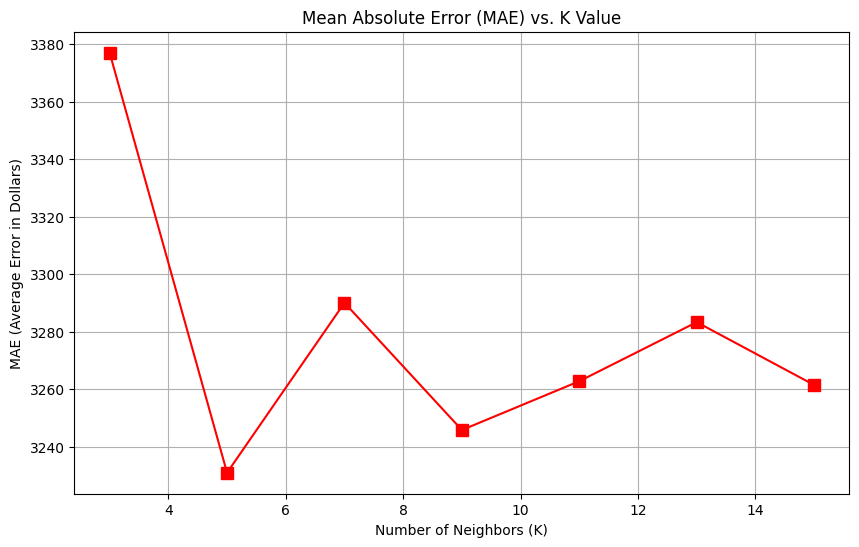

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_mae_scores, marker='s', linestyle='-', color='red', markersize=8)
plt.title('Mean Absolute Error (MAE) vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('MAE (Average Error in Dollars)')
plt.grid(True)
plt.show()

In [12]:
# Train Final Regression Model
final_reg_model = KNeighborsRegressor(n_neighbors=optimal_k_reg)
final_reg_model.fit(X_train_r, y_train_r)

# Predictions
y_pred_r = final_reg_model.predict(X_test_r)

# Evaluation Metrics
mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print("--- Final Regression Performance ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-Squared (Accuracy of Fit): {r2:.4f}")

--- Final Regression Performance ---
Mean Absolute Error (MAE): $3045.71
Root Mean Squared Error (RMSE): $5068.57
R-Squared (Accuracy of Fit): 0.8345
